In [4]:
       # To Check  multicollinearity in model
from statsmodels.stats.outliers_influence import variance_inflation_factor

         # Fitting Polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures

In [5]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 

import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import pickle
%matplotlib inline

# **Polynomial Regression :**

Polynomial Regression is a regression algorithm that models the relationship between a dependent(y) and independent variable(x) as nth degree polynomial. The Polynomial Regression equation is given below:

$$y= b0+b1x1+ b2x12+ b2x13+...... bnx1n$$

<img src="machine-learning-polynomial-regression.png" width="500">

* In the above image, we have taken a dataset which is arranged non-linearly. So if we try to cover it with a linear model, then we can clearly see that it hardly covers any data point. On the other hand, a curve is suitable to cover most of the data points, which is of the Polynomial model.
* Hence, if the datasets are arranged in a non-linear fashion, then we should use the Polynomial Regression model instead of Simple Linear Regression.

Equation of the Polynomial Regression Model:

**Simple Linear Regression equation:**  $$ y = b0+b1x$$       ..(a)

**Multiple Linear Regression equation:** $$y= b0+b1x+ b2x2+ b3x3+....+ bnxn$$  ..(b)


**Polynomial Regression equation:**   $$y= b0+b1x + b2x^2+ b3x^3+....+ bnx^n $$ ...(c)

When we compare the above three equations, we can clearly see that all three equations are Polynomial equations but differ by the degree of variables. The Simple and Multiple Linear equations are also Polynomial equations with a single degree, and the Polynomial regression equation is Linear equation with the nth degree. So if we add a degree to our linear equations, then it will be converted into Polynomial Linear equations.

In [8]:
#importing the dataset

dataset= pd.read_csv('Position_Salaries.csv') # the full namespace of the file can be provided if the file is not in the same directory as the .ipynb or.py file

dataset   # to see how the imported data looks like

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Here, it can be seen that there are 3 columns in the dataset. The problem statement here is to predict the salary based on the
Position and Level of the employee.
But we may observe that the Position and the level are related or level is one other way of conveying the position of the employee in the company. So, essentially Position and Level are conveying the same kind of information. As Level is a numeric column, let's use that in our Machine Learning Model.
Hence, Level is our feature or X variable.
And, Salary is Label or the Y variable

In [12]:
x=dataset.iloc[:,1:2].values
#x=dataset.iloc[:,1].values
# this is written in this way to make x as a matrix as the machine learning algorithm.
# if we write 'x=dataset.iloc[:,1].values', it will return x as a single-dimensional array which is not desired 
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [13]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Generally, we divide our dataset into two parts

1) The training dataset to train our model. And,

2) The test dataset to test our prepared model.

* Here, as the dataset has a limited number of entries, we won't do a split.
Instead of that, we'd use direct numerical values to test the model.
Hence, the code above is kept commented.
But, train test split can also be done, if you desire so:)
    
* To learn Polynomial Regression, we'd follow a comparative approach.
First, we'll try to create a Linear Model using Linear Regression and then we'd prepare a Polynomial Regression Model and see how do they compare to each other

In [14]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Visualising the Linear Regression results


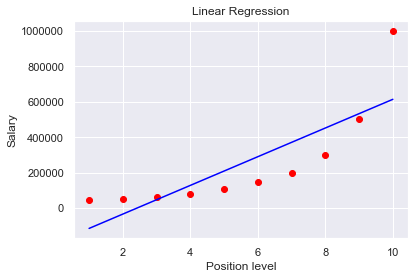

In [15]:
plt.scatter(x, y, color = 'red') # x and y relation points
plt.plot(x, lin_reg.predict(x), color = 'blue') #  pridicted y= lin_reg.predict(x)
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Here, the red dots are the actual data points and, the blue straight line is what our model has created.

* It is evident from the diagram above that a Linear model does not fit our dataset well. 

**So, let's try with a Polynomial Model.**

In [16]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  #trying to create a 2 degree polynomial equation. It simply squares the x as shown in the output
X_poly = poly_reg.fit_transform(x)
print(X_poly)
poly_reg.fit(X_poly, y)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [17]:
# doing the actual polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**It can be noted here that for Polynomial Regression also, we are using the Linear Regression Object.**

Why is it so?
* It is because the Linear in Linear Regression does not talk about the degree of the Polynomial equation in terms of the dependent variable(x). Instead, it talks about the degree of the coefficients. Mathematically,
$$𝑦=𝑎+𝑏𝑥+𝑐𝑥2+...+𝑛𝑥𝑛+...$$
 
 
* It's not talking about the power of x, but the powers of a,b,c etc. And as the coefficients are only of degree 1, hence the name Linear Regression.

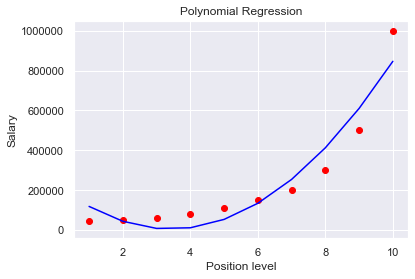

In [18]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

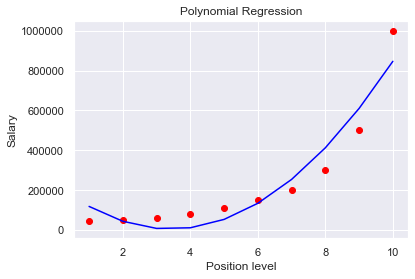

In [23]:
##### tril only

lin_reg_x = poly_reg.fit_transform(x)


# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(lin_reg_x), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Still, a two degree equation is also not a good fit.**

Now, we'll try to increase the degree of the equation i.e. we'll try to see that whether we get a good fit at a higher degree or not.
After some hit and trial, we see that the model get's the best fit for a 4th degree polynomial equation.

In [24]:
# Fitting Polynomial Regression to the dataset
poly_reg1 = PolynomialFeatures(degree = 4)
X_poly1 = poly_reg1.fit_transform(x)
poly_reg1.fit(X_poly, y)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

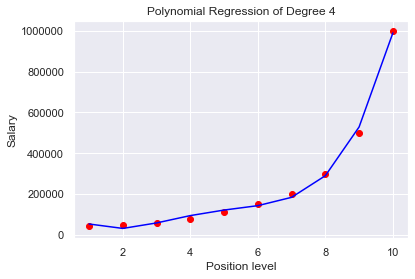

In [25]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_3.predict(poly_reg1.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression of Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Here, we can see that our model now accurately fits the dataset. This kind of a fit might not be the case with the actual business datasets.
we  are getting a brilliant fit as the number of datapoints are a  few.

# polynomial Regression Model--2

# Deployment in cloud and local machine